In [1]:
#pip3 install cfgrib
#pip install eccodes-python
#!pip3 install cfgrib
#!pip3 install eccodes-python
#!pip3 install xarray
#!pip3 install matplotlib
#!pip3 install pandas
#!pip3 install eccodes 
import xarray as xrs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cfgrib


ds = xrs.open_dataset("g20152019/adaptor.mars.external-1710758296.2794812-27871-5-2b8c5e1d-d76b-4f5b-afc6-be3d070806b6.grib", engine='cfgrib')
print(ds)

/home/ori/.local/lib/python3.10/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(


<xarray.Dataset> Size: 831kB
Dimensions:    (time: 92, latitude: 23, longitude: 14)
Coordinates:
  * time       (time) datetime64[ns] 736B 2019-06-01T12:00:00 ... 2019-08-31T...
    surface    float64 8B ...
  * latitude   (latitude) float64 184B 42.2 41.95 41.7 41.45 ... 37.2 36.95 36.7
  * longitude  (longitude) float64 112B 350.2 350.4 350.7 ... 352.9 353.2 353.4
Data variables:
    fbupinx    (time, latitude, longitude) float32 118kB ...
    drtcode    (time, latitude, longitude) float32 118kB ...
    dufmcode   (time, latitude, longitude) float32 118kB ...
    ffmcode    (time, latitude, longitude) float32 118kB ...
    fdsrte     (time, latitude, longitude) float32 118kB ...
    fwinx      (time, latitude, longitude) float32 118kB ...
    infsinx    (time, latitude, longitude) float32 118kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0


In [2]:
import math
def DistanceTwoPoints(lat1, lon1, lat2, lon2):
    R = 6371e3  # Radius of the Earth in meters
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2)**2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    return R * c  # Distance in meters

def count_decimal_places(number):
    str_num = str(number)
    if '.' in str_num:
        return len(str_num) - str_num.index('.') - 1
    else:
        return 0

def find_nearest(lat, lon, latitudes, longitudes):
    min_distance = None
    nearest_point = None

    for lat2, lon2 in zip(latitudes, longitudes):
        distance = DistanceTwoPoints(lat, lon, lat2, lon2)
        if min_distance is None or distance < min_distance:
            min_distance = distance
            nearest_point = (lat2, lon2)

    return min_distance, nearest_point


def find_nearest_index(lat, lon, latitudes, longitudes):
    distances = np.array([DistanceTwoPoints(lat, lon, lat2, lon2) for lat2, lon2 in zip(latitudes, longitudes)])
    sorted_distances_indices = np.argsort(distances)
    nearest_points = [(latitudes[i], longitudes[i]) for i in sorted_distances_indices[:4]]
    min_distances = distances[sorted_distances_indices[:4]]
    return min_distances, nearest_points


def convert_latitude(lon):
    if lon > 180:
        return lon - 360
    return lon

def convert_longitude360(lon):
    if lon < 0:
        return lon + 360
    return lon

In [15]:
print("Coordinates:", ds.coords)
print("Variables:", ds.data_vars)

Coordinates: Coordinates:
  * time       (time) datetime64[ns] 976B 2015-06-01T12:00:00 ... 2015-09-30T...
    surface    float64 8B ...
  * latitude   (latitude) float64 184B 42.2 41.95 41.7 41.45 ... 37.2 36.95 36.7
  * longitude  (longitude) float64 112B 350.2 350.4 350.7 ... 352.9 353.2 353.4
Variables: Data variables:
    fbupinx   (time, latitude, longitude) float32 157kB ...
    drtcode   (time, latitude, longitude) float32 157kB ...
    dufmcode  (time, latitude, longitude) float32 157kB ...
    ffmcode   (time, latitude, longitude) float32 157kB ...
    fdsrte    (time, latitude, longitude) float32 157kB ...
    fwinx     (time, latitude, longitude) float32 157kB ...
    infsinx   (time, latitude, longitude) float32 157kB ...


In [16]:
fwinx = ds['fwinx']
lat = ds['latitude']
lon = ds['longitude']
tm = ds['time']

print(lat[1].coords['latitude'].values)
print(len(lat))
print(len(lon))
#print(lon)

41.95
23
14


In [6]:
print(len(ds['fwinx'].values))
print(len(ds['fwinx'][0].values))

122
23


In [3]:
# Select the 'fwinx' data variable at the desired time
fwinx_at_time = ds['fwinx'].sel(time='2019-06-20T12:00:00')

print(fwinx_at_time)

# Get the 'latitude' coordinate
latitudes = fwinx_at_time.latitude
longitudes = fwinx_at_time.longitude

# Print the latitudes
print(latitudes.values)
print(len(latitudes.values))
print(longitudes.values)
print(len(longitudes.values))

novas_lat = []
novas_lon = []
for lat in range(len(latitudes)):
    for lon in range(len(longitudes)):
        #novas_lat.append(latitudes[lat])
        novas_lat.append(latitudes[lat].values)
        novas_lon.append(longitudes[lon].values)
        #novas_lon.append(longitudes[lon])

print(len(novas_lat))
print(len(novas_lon))

#
LATITUDE_SING = 40.0299179999034
LONGITUDE_SING = -7.77199699984656
min_distance, nearest_point = find_nearest(LATITUDE_SING, LONGITUDE_SING, novas_lat, novas_lon)
print(min_distance, nearest_point)

<xarray.DataArray 'fwinx' (latitude: 23, longitude: 14)> Size: 1kB
[322 values with dtype=float32]
Coordinates:
    time       datetime64[ns] 8B 2019-06-20T12:00:00
    surface    float64 8B ...
  * latitude   (latitude) float64 184B 42.2 41.95 41.7 41.45 ... 37.2 36.95 36.7
  * longitude  (longitude) float64 112B 350.2 350.4 350.7 ... 352.9 353.2 353.4
Attributes: (12/28)
    GRIB_paramId:                             260540
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      322
    GRIB_typeOfLevel:                         surface
    GRIB_stepType:                            instant
    GRIB_gridType:                            regular_ll
    ...                                       ...
    GRIB_name:                                Forest fire weather index
    GRIB_shortName:                           fwinx
    GRIB_units:                               Numeric
    long_name:                                Forest fire weather index
    uni

In [21]:
#https://archive-api.open-meteo.com/v1/archive?latitude=40.2,40.2&longitude=-7.300000000000011,-7.550000000000011&start_date=2015-06-21,2015-06-21&end_date=2015-09-29,2015-09-29&hourly=temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,is_day,sunshine_duration,shortwave_radiation,direct_radiation,diffuse_radiation,direct_normal_irradiance,global_tilted_irradiance,terrestrial_radiation,shortwave_radiation_instant,direct_radiation_instant,diffuse_radiation_instant,direct_normal_irradiance_instant,global_tilted_irradiance_instant,terrestrial_radiation_instant&timezone=GMT,GMT

header = "https://archive-api.open-meteo.com/v1/archive?latitude="
gmt = ""
start_date = ""
end_date = ""
latitudes = ""
longitudes = ""
x = 270
for i in range(270, len(novas_lat)):
    if(i < len(novas_lat)-1):
        latitudes += f"{novas_lat[i]},"
        longitudes += f"{novas_lon[i]},"
        start_date += "2015-06-21,"
        end_date += "2015-06-21,"
        gmt += "GMT,"
    else:
        latitudes += f"{novas_lat[i]}"
        longitudes += f"{novas_lon[i]}"
        gmt += "GMT"
        start_date += "2015-06-21"
        end_date += "2015-06-21"

    

url = f"https://archive-api.open-meteo.com/v1/archive?latitude={latitudes}&longitude={longitudes}&start_date={start_date}&end_date={end_date}&hourly=temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,is_day,sunshine_duration,shortwave_radiation,direct_radiation,diffuse_radiation,direct_normal_irradiance,global_tilted_irradiance,terrestrial_radiation,shortwave_radiation_instant,direct_radiation_instant,diffuse_radiation_instant,direct_normal_irradiance_instant,global_tilted_irradiance_instant,terrestrial_radiation_instant&timezone={gmt}"
print(url)
with open("url.txt", "w") as f:
    f.write(url)

https://archive-api.open-meteo.com/v1/archive?latitude=37.45,37.45,37.45,37.45,37.45,37.45,37.45,37.45,37.45,37.45,37.2,37.2,37.2,37.2,37.2,37.2,37.2,37.2,37.2,37.2,37.2,37.2,37.2,37.2,36.95,36.95,36.95,36.95,36.95,36.95,36.95,36.95,36.95,36.95,36.95,36.95,36.95,36.95,36.7,36.7,36.7,36.7,36.7,36.7,36.7,36.7,36.7,36.7,36.7,36.7,36.7,36.7&longitude=-8.800000000000011,-8.550000000000011,-8.300000000000011,-8.050000000000011,-7.800000000000011,-7.550000000000011,-7.300000000000011,-7.050000000000011,-6.800000000000011,-6.550000000000011,-9.800000000000011,-9.550000000000011,-9.300000000000011,-9.050000000000011,-8.800000000000011,-8.550000000000011,-8.300000000000011,-8.050000000000011,-7.800000000000011,-7.550000000000011,-7.300000000000011,-7.050000000000011,-6.800000000000011,-6.550000000000011,-9.800000000000011,-9.550000000000011,-9.300000000000011,-9.050000000000011,-8.800000000000011,-8.550000000000011,-8.300000000000011,-8.050000000000011,-7.800000000000011,-7.550000000000011,-7.30

In [25]:
dfstations = pd.read_csv("Samples/CopernicusToOpenMeteo/combinedStations.csv")
print(dfstations['latitude'], dfstations['longitude'])
print(([lat.item() for lat in novas_lat]), novas_lon)

0      40.949030
1      40.949030
2      40.949030
3      40.949030
4      40.667835
         ...    
317    37.715290
318    37.434093
319    37.434093
320    37.434093
321    37.434093
Name: latitude, Length: 322, dtype: float64 0     -7.307678
1     -7.051270
2     -6.794861
3     -6.538452
4     -9.815887
         ...   
317   -6.497314
318   -9.813843
319   -9.574463
320   -9.335114
321   -9.095734
Name: longitude, Length: 322, dtype: float64
[42.2, 42.2, 42.2, 42.2, 42.2, 42.2, 42.2, 42.2, 42.2, 42.2, 42.2, 42.2, 42.2, 42.2, 41.95, 41.95, 41.95, 41.95, 41.95, 41.95, 41.95, 41.95, 41.95, 41.95, 41.95, 41.95, 41.95, 41.95, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.45, 41.45, 41.45, 41.45, 41.45, 41.45, 41.45, 41.45, 41.45, 41.45, 41.45, 41.45, 41.45, 41.45, 41.2, 41.2, 41.2, 41.2, 41.2, 41.2, 41.2, 41.2, 41.2, 41.2, 41.2, 41.2, 41.2, 41.2, 40.95, 40.95, 40.95, 40.95, 40.95, 40.95, 40.95, 40.95, 40.95, 40.95, 40.95, 40.95, 40.95, 40.95, 4

In [26]:
min_distance = float('inf')
closest_points = None

for _, row in dfstations.iterrows():
    for lat, lon in zip(novas_lat, novas_lon):
        distance = DistanceTwoPoints(row['latitude'], row['longitude'], lat, lon)
        if distance < min_distance:
            min_distance = distance
            closest_points = ((row['latitude'], row['longitude']), (lat, lon))

print(f"The closest points are {closest_points} with a distance of {min_distance} meters.")

The closest points are ((40.94903, -7.0512695), (array(40.95), -7.050000000000011)) with a distance of 151.6606259772792 meters.


In [13]:
print(len(novas_lat))
print(int(len(novas_lon)/4))

322
80


In [20]:
for q in range(1, 9):
    print(q)

1
2
3
4
5
6
7
8


In [21]:
LATITUDE_SING = 40.20875
LONGITUDE_SING = -7.36260499954224
min_distance, nearest_point = find_nearest_index(LATITUDE_SING, LONGITUDE_SING, novas_lat, novas_lon)
print(min_distance, nearest_point)

[ 5405.00664601 15944.18677979 26565.71460547 27345.6632578 ] [(array(40.2), array(352.7)), (array(40.2), array(352.45)), (array(40.2), array(352.95)), (array(40.45), array(352.7))]


In [24]:
print("Latitude:", nearest_point[1][0])
print("Longitude:", convert_latitude(nearest_point[1][1]))

Latitude: 40.2
Longitude: -7.550000000000011


In [16]:
print([lat.item() for lat in novas_lat])
novas_lon = [(lon-360 if lon>180 else lon) for lon in novas_lon]
print(novas_lon)

[42.2, 42.2, 42.2, 42.2, 42.2, 42.2, 42.2, 42.2, 42.2, 42.2, 42.2, 42.2, 42.2, 42.2, 41.95, 41.95, 41.95, 41.95, 41.95, 41.95, 41.95, 41.95, 41.95, 41.95, 41.95, 41.95, 41.95, 41.95, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.45, 41.45, 41.45, 41.45, 41.45, 41.45, 41.45, 41.45, 41.45, 41.45, 41.45, 41.45, 41.45, 41.45, 41.2, 41.2, 41.2, 41.2, 41.2, 41.2, 41.2, 41.2, 41.2, 41.2, 41.2, 41.2, 41.2, 41.2, 40.95, 40.95, 40.95, 40.95, 40.95, 40.95, 40.95, 40.95, 40.95, 40.95, 40.95, 40.95, 40.95, 40.95, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.7, 40.45, 40.45, 40.45, 40.45, 40.45, 40.45, 40.45, 40.45, 40.45, 40.45, 40.45, 40.45, 40.45, 40.45, 40.2, 40.2, 40.2, 40.2, 40.2, 40.2, 40.2, 40.2, 40.2, 40.2, 40.2, 40.2, 40.2, 40.2, 39.95, 39.95, 39.95, 39.95, 39.95, 39.95, 39.95, 39.95, 39.95, 39.95, 39.95, 39.95, 39.95, 39.95, 39.7, 39.7, 39.7, 39.7, 39.7, 39.7, 39.7, 39.7, 39.7, 39.7, 39.7, 39.7, 39.7, 39.7, 39.45

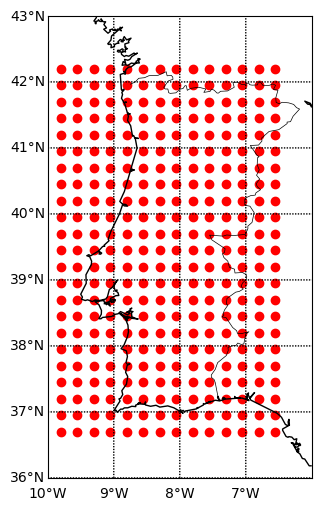

In [61]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(10,6))

# Create a Basemap instance for Portugal and expanded north
m = Basemap(llcrnrlon=-10, llcrnrlat=36, urcrnrlon=-6, urcrnrlat=43, resolution='i')

# Draw coastlines, countries, and meridians/parallels
m.drawcoastlines()
m.drawcountries()
m.drawmeridians(np.arange(-10, -6, 1), labels=[1,0,0,1])
m.drawparallels(np.arange(36, 51, 1), labels=[1,0,0,1])  # Adjusted to match new map extent

# Convert latitudes and longitudes to map projection coordinates
x, y = m(novas_lon, novas_lat)

# Plot the data
m.scatter(x, y, marker='o', color='red')

plt.savefig('stations.png', dpi=300)
# Show the plot
plt.show()

In [27]:
LATITUDE_SING = 40.95
LONGITUDE_SING = -7.050000000000011
min_distance, nearest_point = find_nearest(LATITUDE_SING, LONGITUDE_SING, novas_lat, novas_lon)
print(min_distance, nearest_point)

latitude_data_array, longitude_data_array = nearest_point
print("Latitude:", latitude_data_array, "Longitude:", longitude_data_array)

#latitude = latitude_data_array.values.item()
#longitude = longitude_data_array.values.item()

#print("Latitude:", latitude)
#print("Longitude:", longitude)

0.0 (array(40.95), -7.050000000000011)
Latitude: 40.95 Longitude: -7.050000000000011


In [31]:
print(convert_longitude360(-7.050000000000011))

352.95


In [54]:
DAY = 21
HOUR = 12

fwinx_value = ds['fwinx'].sel(time=f'2015-06-{DAY}T{HOUR}:00:00', latitude=latitude_data_array, longitude=352.95)
drtcode_value = ds['drtcode'].sel(time=f'2015-06-{DAY}T{HOUR}:00:00', latitude=latitude_data_array, longitude=352.95)
dufmcode_value = ds['dufmcode'].sel(time=f'2015-06-{DAY}T{HOUR}:00:00', latitude=latitude_data_array, longitude=352.95)
ffmcode_value = ds['ffmcode'].sel(time=f'2015-06-{DAY}T{HOUR}:00:00', latitude=latitude_data_array, longitude=352.95)


#drtcode    (time, latitude, longitude) float32 79kB ... -> Drought Code: DC 
#    dufmcode   (time, latitude, longitude) float32 79kB ... -> Duff Moisture Code Code
#    ffmcode    (time, latitude, longitude) float32 79kB ... -> Fine Fuel Moisture Code

print(fwinx_value.values.item())
print("Drought Code (DC): ", drtcode_value.values.item())
print("Duff Moisture Code (DMC): ",dufmcode_value.values.item())
print("Fine Fuel Moisture Code (FFMC): ", ffmcode_value.values.item())

29.0068359375
Drought Code (DC):  468.021484375
Duff Moisture Code (DMC):  58.990211486816406
Fine Fuel Moisture Code (FFMC):  94.8427734375


In [20]:
'''
fbupinx   (time, latitude, longitude) float32 157kB ...
    drtcode   (time, latitude, longitude) float32 157kB ...
    dufmcode  (time, latitude, longitude) float32 157kB ...
    ffmcode   (time, latitude, longitude) float32 157kB ...
    fdsrte    (time, latitude, longitude) float32 157kB ...
    fwinx     (time, latitude, longitude) float32 157kB ...
    infsinx   (time, latitude, longitude) float32 157kB

'''


HOUR = 12
plat = 40.2
plon = 352.7
for d in range(20, 21):
    temp = f'2015-06-{d}T{HOUR}:00:00'
    print(temp)
    fwinx_value = ds['fwinx'].sel(time=f'2015-06-{d}T{HOUR}:00:00', latitude=plat, longitude=plon)
    drtcode_value = ds['drtcode'].sel(time=f'2015-06-{d}T{HOUR}:00:00', latitude=plat, longitude=plon)
    dufmcode_value = ds['dufmcode'].sel(time=f'2015-06-{d}T{HOUR}:00:00', latitude=plat, longitude=plon)
    ffmcode_value = ds['ffmcode'].sel(time=f'2015-06-{d}T{HOUR}:00:00', latitude=plat, longitude=plon)
    fbupinx_value = ds['fbupinx'].sel(time=f'2015-06-{d}T{HOUR}:00:00', latitude=plat, longitude=plon)
    infsinx_value = ds['infsinx'].sel(time=f'2015-06-{d}T{HOUR}:00:00', latitude=plat, longitude=plon)
    

    print(fwinx_value.values.item())
    print("Drought Code (DC): ", drtcode_value.values.item())
    print("Duff Moisture Code (DMC): ",dufmcode_value.values.item())
    print("Fine Fuel Moisture Code (FFMC): ", ffmcode_value.values.item())
    print("Build Up Index (BUI): ", fbupinx_value.values.item())
    print("Initial Spread Index (ISI): ", infsinx_value.values.item())
    print(" ")


2015-06-20T12:00:00
29.522537231445312
Drought Code (DC):  370.92425537109375
Duff Moisture Code (DMC):  65.2578125
Fine Fuel Moisture Code (FFMC):  94.29084014892578
Build Up Index (BUI):  90.4296875
Initial Spread Index (ISI):  10.14145278930664
 


In [7]:
import numpy as np

# Convert the dates to numpy datetime64
dates = np.array(ds['time'].values, dtype='datetime64')

# Define the date range
start_date = np.datetime64('2019-06-21')
end_date = np.datetime64('2019-08-28')

# Get the dates within the range
filtered_dates = dates[(dates > start_date) & (dates < end_date)]

# Print the filtered dates
print(filtered_dates)
print(len(filtered_dates))

['2019-06-21T12:00:00.000000000' '2019-06-22T12:00:00.000000000'
 '2019-06-23T12:00:00.000000000' '2019-06-24T12:00:00.000000000'
 '2019-06-25T12:00:00.000000000' '2019-06-26T12:00:00.000000000'
 '2019-06-27T12:00:00.000000000' '2019-06-28T12:00:00.000000000'
 '2019-06-29T12:00:00.000000000' '2019-06-30T12:00:00.000000000'
 '2019-07-01T12:00:00.000000000' '2019-07-02T12:00:00.000000000'
 '2019-07-03T12:00:00.000000000' '2019-07-04T12:00:00.000000000'
 '2019-07-05T12:00:00.000000000' '2019-07-06T12:00:00.000000000'
 '2019-07-07T12:00:00.000000000' '2019-07-08T12:00:00.000000000'
 '2019-07-09T12:00:00.000000000' '2019-07-10T12:00:00.000000000'
 '2019-07-11T12:00:00.000000000' '2019-07-12T12:00:00.000000000'
 '2019-07-13T12:00:00.000000000' '2019-07-14T12:00:00.000000000'
 '2019-07-15T12:00:00.000000000' '2019-07-16T12:00:00.000000000'
 '2019-07-17T12:00:00.000000000' '2019-07-18T12:00:00.000000000'
 '2019-07-19T12:00:00.000000000' '2019-07-20T12:00:00.000000000'
 '2019-07-21T12:00:00.000

In [5]:
#), array(
DAY = 21
HOUR = 12
MONTH = 6

plat = 39.95
plon = 352.2
fwinx_value = ds['fwinx'].sel(time=f'2019-06-{DAY}T{HOUR}:00:00', latitude=plat, longitude=plon)
drtcode_value = ds['drtcode'].sel(time=f'2019-06-{DAY}T{HOUR}:00:00', latitude=plat, longitude=plon)
dufmcode_value = ds['dufmcode'].sel(time=f'2019-06-{DAY}T{HOUR}:00:00', latitude=plat, longitude=plon)
ffmcode_value = ds['ffmcode'].sel(time=f'2019-06-{DAY}T{HOUR}:00:00', latitude=plat, longitude=plon)


#drtcode    (time, latitude, longitude) float32 79kB ... -> Drought Code: DC 
#    dufmcode   (time, latitude, longitude) float32 79kB ... -> Duff Moisture Code Code
#    ffmcode    (time, latitude, longitude) float32 79kB ... -> Fine Fuel Moisture Code

print(fwinx_value.values.item())
print("Drought Code (DC): ", drtcode_value.values.item())
print("Duff Moisture Code (DMC): ",dufmcode_value.values.item())
print("Fine Fuel Moisture Code (FFMC): ", ffmcode_value.values.item())

22.05933380126953
Drought Code (DC):  384.6829833984375
Duff Moisture Code (DMC):  97.203125
Fine Fuel Moisture Code (FFMC):  87.82327270507812


In [8]:
'''
    fbupinx   (time, latitude, longitude) float32 157kB ...
    drtcode   (time, latitude, longitude) float32 157kB ...
    dufmcode  (time, latitude, longitude) float32 157kB ...
    ffmcode   (time, latitude, longitude) float32 157kB ...
    fdsrte    (time, latitude, longitude) float32 157kB ...
    fwinx     (time, latitude, longitude) float32 157kB ...
    infsinx   (time, latitude, longitude) float32 157kB ...
'''

plat = 39.95
plon = 352.2
fwinx_values = []
ffmcode_values = []
drtcode_values = []
dufmcode_values = []
fbupinx_values = []
infsinx_values = []

for dt in filtered_dates:
    fwinx_value = ds['fwinx'].sel(time=dt, latitude=plat, longitude=plon)
    fwinx_values.append(fwinx_value.values.item())

    ffmcode_value = ds['ffmcode'].sel(time=dt, latitude=plat, longitude=plon)
    ffmcode_values.append(ffmcode_value.values.item())

    drtcode_value = ds['drtcode'].sel(time=dt, latitude=plat, longitude=plon)
    drtcode_values.append(drtcode_value.values.item())

    dufmcode_value = ds['dufmcode'].sel(time=dt, latitude=plat, longitude=plon)
    dufmcode_values.append(dufmcode_value.values.item())

    fbupinx_value = ds['fbupinx'].sel(time=dt, latitude=plat, longitude=plon)
    fbupinx_values.append(fbupinx_value.values.item())

    infsinx_value = ds['infsinx'].sel(time=dt, latitude=plat, longitude=plon)
    infsinx_values.append(infsinx_value.values.item())

    
print(fwinx_values)
print(len(fwinx_values))
print(len(ffmcode_values))
print(len(drtcode_values))
print(len(dufmcode_values))
print(len(fbupinx_values))
print(len(infsinx_values))

[22.05933380126953, 36.414791107177734, 6.0517578125, 5.630859375, 6.286993026733398, 11.950032234191895, 16.180086135864258, 18.7333984375, 23.6318359375, 25.75583839416504, 24.40540313720703, 22.731998443603516, 27.0361328125, 26.7333984375, 27.0517578125, 28.9716796875, 27.1962890625, 27.708629608154297, 26.954547882080078, 36.90666580200195, 35.56087112426758, 43.48421096801758, 25.8125, 21.716796875, 28.521080017089844, 27.75685691833496, 27.625, 32.767578125, 41.19060516357422, 43.3916015625, 34.7412109375, 42.3076171875, 34.775390625, 47.34032440185547, 38.486358642578125, 46.556541442871094, 17.27384376525879, 25.939119338989258, 39.353179931640625, 42.37890625, 33.560546875, 46.952110290527344, 38.3466796875, 42.015625, 42.380897521972656, 38.486328125, 39.79296875, 22.0615234375, 9.4404296875, 7.978515625, 14.201658248901367, 31.40258026123047, 33.41557312011719, 29.66535186767578, 35.1279296875, 40.82421875, 40.4189453125, 33.015625, 39.13111114501953, 30.98202133178711, 39.

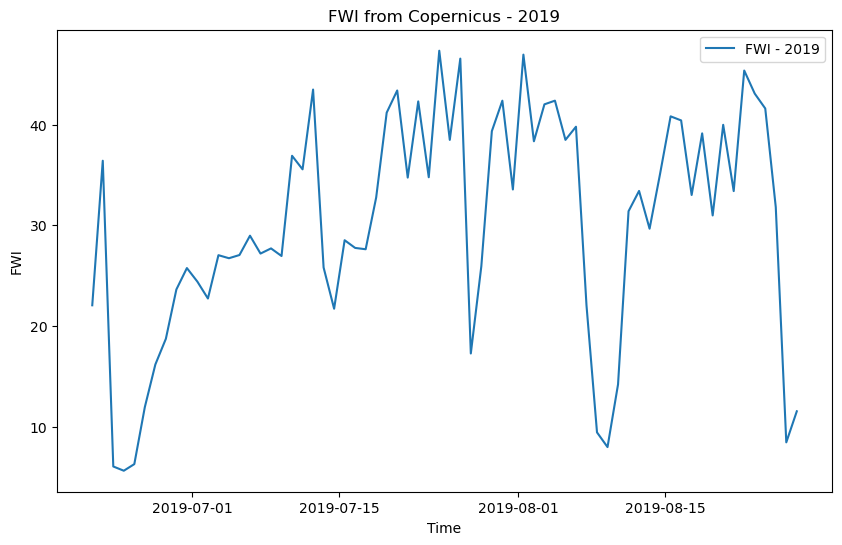

In [11]:
import matplotlib.pyplot as plt

metvar = "FWI"
__year = 2019

plt.figure(figsize=(10,6))
plt.plot(filtered_dates, fwinx_values, label=f'{metvar} - {__year}')
plt.xlabel('Time')
plt.ylabel(f'{metvar}')
plt.title(f'{metvar} from Copernicus - {__year}')
plt.legend()
plt.savefig(f'{__year}Copernicus{metvar}12.png', dpi=300)
plt.show()

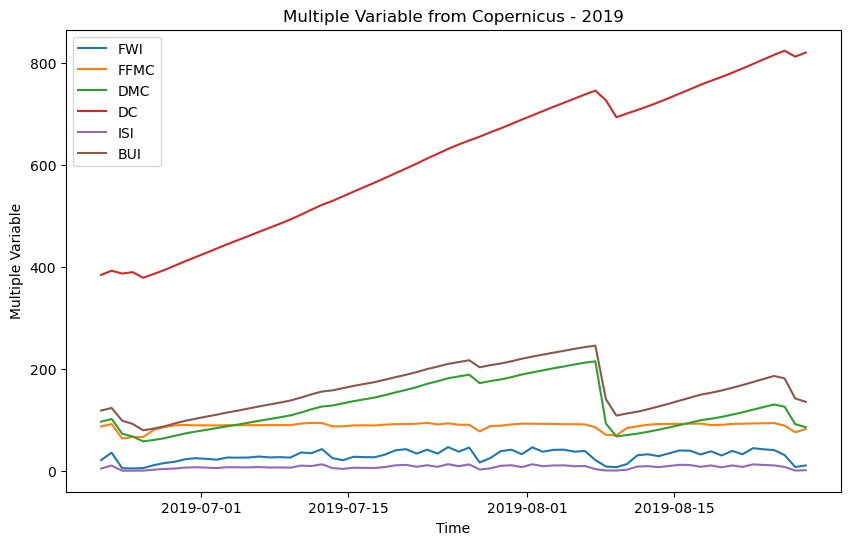

In [9]:
import matplotlib.pyplot as plt

metvar = "Multiple Variable"
__year = 2019

plt.figure(figsize=(10,6))
plt.plot(filtered_dates, fwinx_values, label=f'FWI')
plt.plot(filtered_dates, ffmcode_values, label=f'FFMC')
plt.plot(filtered_dates, dufmcode_values, label=f'DMC')
plt.plot(filtered_dates, drtcode_values, label=f'DC')
plt.plot(filtered_dates, infsinx_values, label=f'ISI')
plt.plot(filtered_dates, fbupinx_values, label=f'BUI')

plt.xlabel('Time')
plt.ylabel(f'{metvar}')
plt.title(f'{metvar} from Copernicus - {__year}')
plt.legend()
plt.savefig(f'{__year}Copernicus{metvar}12.png', dpi=300)
plt.show()

[89.55563354492188, 95.57125854492188, 91.33229064941406, 96.1951904296875, 102.58798217773438, 110.39353942871094, 118.20407104492188, 126.00291442871094, 134.30760192871094, 142.15916442871094, 146.828125, 151.3828125, 157.234375, 162.2985076904297, 166.85028076171875, 172.9547576904297, 178.2672576904297, 183.4303741455078, 188.8375701904297, 193.29559326171875, 197.69891357421875, 202.70089721679688, 208.0006866455078, 213.56517028808594, 219.2734375, 224.2265625, 229.234375, 233.4453125, 237.390625, 241.6953125, 245.453125, 249.8515625, 254.4921875, 257.70574951171875, 261.85943603515625, 266.4661560058594, 270.4635314941406, 274.5207824707031, 278.3175048828125, 281.6821594238281, 164.0827178955078, 147.8066864013672, 153.6295928955078, 159.4420928955078, 163.9473114013672, 169.6139678955078, 174.9889678955078, 179.2389678955078, 183.70248413085938, 189.1191864013672, 194.6348114013672, 199.8327178955078, 204.65560913085938, 207.4673614501953, 210.6757049560547, 213.6861114501953

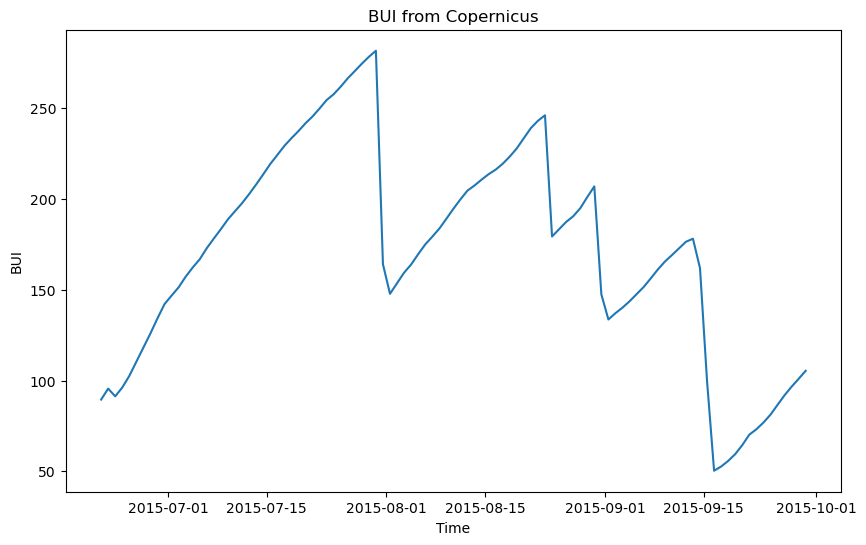

In [39]:
import matplotlib.pyplot as plt
#Outras Variáveis
'''
    fbupinx   (time, latitude, longitude) float32 157kB ...
    drtcode   (time, latitude, longitude) float32 157kB ...
    dufmcode  (time, latitude, longitude) float32 157kB ...
    ffmcode   (time, latitude, longitude) float32 157kB ...
    fdsrte    (time, latitude, longitude) float32 157kB ...
    fwinx     (time, latitude, longitude) float32 157kB ...
    infsinx   (time, latitude, longitude) float32 157kB ...
'''

plat = 40.95
plon = 352.95
met_variables = []
for dt in filtered_dates:
    met_variable = ds['fbupinx'].sel(time=dt, latitude=plat, longitude=plon)
    met_variables.append(met_variable.values.item())

print(met_variables)
print(len(met_variables))

plt.figure(figsize=(10,6))
plt.plot(filtered_dates, met_variables, label='ISI')
plt.xlabel('Time')
plt.ylabel('BUI')
plt.title('BUI from Copernicus')
plt.legend
plt.savefig('2015CopernicusISI12.png', dpi=300)
plt.show()